# KNN for CISCO equipment data set

**Important !!!**

To work with *base map* (library to map coordinates) run the following code **ONCE** and then restart the runtime. Continue from the next code cell

## Start from here if starting from zero.

In [ ]:
# Run this 1st and then restart runtime
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (170 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144487 files and directories currently installed.)
Pre

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702118 sha256=2fe337d15025d17ab5cd3b3f7e81002e2569a75f6513382094d5b3f764a00024
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [ ]:
import pandas as pd

f1 = pd.read_excel('LineDetails - 2019-11-21T153544.536.xlsx', skiprows=5)
f2 = pd.read_excel('LineDetails - 2019-11-22T100336.168.xlsx', skiprows=5)

data = pd.concat([f1, f2], ignore_index=True, sort=False)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46687 entries, 0 to 46686
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Product Number                    46687 non-null  object        
 1   Product Description               46687 non-null  object        
 2   Last Date of Support              16255 non-null  datetime64[ns]
 3   Last Date of Sale                 16288 non-null  datetime64[ns]
 4   PAK/Serial Number                 42542 non-null  object        
 5   Parent PAK/Serial Number          46407 non-null  object        
 6   Major/Minor                       46687 non-null  object        
 7   Instance Number                   46687 non-null  int64         
 8   Parent Instance Number            46687 non-null  int64         
 9   Installed Base Status             46687 non-null  object        
 10  End Customer GU                   46682 non-nu

,Product Number,Product Description,Last Date of Support,Last Date of Sale,PAK/Serial Number,Parent PAK/Serial Number,Major/Minor,Instance Number,Parent Instance Number,Installed Base Status,End Customer GU,End Customer GU Name,End Customer ID,End Customer Name,End Customer Address,End Customer City,End Customer State,End Customer Province,End Customer County,End Customer Country,End Customer Zip/Postal Code,Subscription/Service SKU,Subscription/Service Description,Subscription/Service Level,Coverage Start Date,Coverage End Date,Contract Number,Contract Line Status,Covered Line Number,Potential Takeover,Host/MAC ID,Carton ID,Quantity,Contract Line Amount,Contract Bill to GU,Contract Bill to GU Name,Contract Bill to ID,Contract Bill to Name,Contract Bill to Address,Contract Bill to City,...,Item Type,Warranty Type,Warranty Status,Warranty End Date,Ship Date,End User GU,Reseller GU,Product Bill To ID,Product Bill to Name,Product Bill To Address,Product Bill To City,Product Bill To State,Product Bill To Province,Product Bill To County,Product Bill To Country,Product Bill To Postal Code,Product Ship to ID,Product Ship to Name,Product Ship to Address,Product Ship To City,Product Ship To State,Product Ship To Province,Product Ship To County,Product Ship To Country,Product Ship To Postal Code,Distributor Bill To ID,Distributor Bill To Name,Distributor Bill To GU Name,Distributor Bill To GU ID,Distributor Bill To Address,Distributor Bill To City,Distributor Bill To State,Distributor Bill To Province,Distributor Bill To County,Distributor Bill To Country,Distributor Bill To Postal Code,Cisco Capital Bill to ID,Smart Account / Virtual Account,Eligible for quoting,Reason for ineligibility
0,XFP-10GLR-OC192SR,Multirate XFP module for 10GBASE-LR and OC192 ...,2022-01-31,2017-01-31,AGA1624N56Z,AGA1624N56Z,Major,1035963519,1035963519,Latest-INSTALLED,6547768.0,AMERICA MOVIL SAB DE CV,1655003,UNINET SA DE CV,COLIMA 229 SUR COL SAN ANTONIO,SAN ANTONIO,NAY,NAY,NaN,MX,63159,SP-AR3-XFP10GSR,SP Base Support with HW AR Level 3,SPAR3,2019-04-17,2021-12-31,93104331.0,ACTIVE,1.993714,No,NaN,NaN,1,0.0,6547768.0,AMERICA MOVIL SAB DE CV,896369.0,UNINET SA DE CV,INSURGENTES SUR 3500 PISO 4 COLONIA PENA POBRE,TLALPAN,...,CARD,WARR-90-DAY-LTD-HW,Not Under Warranty,2013-04-13,2012-10-13 00:00:00,NaN,NaN,896369.0,UNINET SA DE CV,INSURGENTES SUR 3500 PISO 4 COLONIA PENA POBRE,TLALPAN,DF,NaN,NaN,MX,14060,402349861.0,UNINET S.A. DE C.V.,PERIFERICO SUR 3190 COL.JARDINES DEL PEDREGAL,MEXICO,DISTRITO FEDERAL,NaN,NaN,MX,01900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
1,CFP-100G-LR4,100GBASE-LR4 CFP Module,2024-09-30,2019-09-27,FIN16340077,FIN16340077,Major,1057028961,1057028961,Latest-INSTALLED,6547768.0,AMERICA MOVIL SAB DE CV,1650916,UNINET SA DE CV,PINO SUAREZ 393 ESQ MELCHOR OCAMPO COL CENTRO,ZAPOPAN,JAL,JAL,NaN,MX,45100,SP-AR3-CFP100GL,SP Base Support with HW AR Level 3,SPAR3,2019-04-17,2021-12-31,93104331.0,ACTIVE,1.101904,No,NaN,NaN,1,0.0,6547768.0,AMERICA MOVIL SAB DE CV,896369.0,UNINET SA DE CV,INSURGENTES SUR 3500 PISO 4 COLONIA PENA POBRE,TLALPAN,...,CARD,WARR-DEFAULT-90DAY,Not Under Warranty,2013-04-30,2012-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
2,X2-10GB-LR=,10GBASE-LR X2 Module,NaT,NaT,AGA1633X37F,AGA1633X37F,Major,1077365527,1077365527,Latest-INSTALLED,6547768.0,AMERICA MOVIL SAB DE CV,400425870,UNINET INC,2323 BRYAN ST FLOOR 14TH SUITE 1400,DALLAS,TX,TX,NaN,US,75201,NaN,SP Base Support with HW AR Level 3,SPAR3,2019-04-17,2021-12-31,93104331.0,ACTIVE,1.993745,No,NaN,NaN,1,0.0,6547768.0,AMERICA MOVIL SAB DE CV,896369.0,UNINET SA DE CV,INSURGENTES SUR 3500 PISO 4 COLONIA PENA POBRE,TLALPAN,...,CARD,WARR-90-DAY-LTD-HW,Not Under Warranty,2013-05-15,2012-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
3,X2-10GB-LR=,10GB

In [ ]:
# remove columns with no data
idx = [not all(data[d].isnull()) for d in data ]
data = data.loc[:,idx]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46687 entries, 0 to 46686
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Product Number                    46687 non-null  object        
 1   Product Description               46687 non-null  object        
 2   Last Date of Support              16255 non-null  datetime64[ns]
 3   Last Date of Sale                 16288 non-null  datetime64[ns]
 4   PAK/Serial Number                 42542 non-null  object        
 5   Parent PAK/Serial Number          46407 non-null  object        
 6   Major/Minor                       46687 non-null  object        
 7   Instance Number                   46687 non-null  int64         
 8   Parent Instance Number            46687 non-null  int64         
 9   Installed Base Status             46687 non-null  object        
 10  End Customer GU                   46682 non-nu

In [ ]:
# Obtain The Address city and zipcode
address = data.filter( regex=r"End Customer.*(?:Address|City|Zip)")
f'{address.size} number of address'


'140061 number of address'

In [ ]:
# Remove duplicates
address = address.drop_duplicates()

# Reset indexes
address = address.reset_index(drop=True)

# Change NaN values to empty spaces
address.fillna('',inplace=True)
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   End Customer Address          1283 non-null   object
 1   End Customer City             1283 non-null   object
 2   End Customer Zip/Postal Code  1283 non-null   object
dtypes: object(3)
memory usage: 30.2+ KB


In [ ]:
# Library to access Google API
from geopy.geocoders import GoogleV3
import time
from tqdm import tqdm

APIk = 'Add Valid Google API Key'
# API Key
geolocator = GoogleV3(APIk)
loc = []

# Search each address into google maps API and return coordinates
for a in tqdm(address.values):
  add = ' '.join(a).lstrip()

  # If TimeOut wait a second
  try:
    coordinates = geolocator.geocode(add)
  except Exception as e:
    print(f'Error: Failed on address {add} with message {e}')
    time.sleep(1)
    coordinates = geolocator.geocode(add)
     
  # If couldnt find coordinates mark if with an x
  if coordinates is None:
    loc.append([add,'x'])
  else:
    loc.append([add, coordinates])


 61%|██████    | 777/1283 [05:32<03:34,  2.35it/s]

Error: Failed on address PARQUE INDUSTRIAL COL SAN LUIS POTOSI SAN LUIS POTOSI 78000 with message Service timed out


100%|██████████| 1283/1283 [09:07<00:00,  2.34it/s]


In [ ]:
from google.colab import files


geo = [[l[0],['x','x','x']] if isinstance(l[1],str) else [l[0],list(l[1].point)] for l in loc]
pd.DataFrame(geo,columns=['Address', 'Coordinates']).to_csv('Locations.csv')
files.download('Locations.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## If locations.csv is loaded start from here

In [ ]:
import pandas as pd

locations = pd.read_csv('Locations.csv')
locations = locations.drop('Unnamed: 0', axis=1)

In [ ]:
# The values of coordinates were saved as complete strings 

address = locations['Address']
coordinates = locations['Coordinates']
# Remove the square braquets and white spaces
coordinates = coordinates.replace(
                      dict.fromkeys(["'","\[", "\]"," "],""),
                      regex=True)
# Separate values from string and convert to data frame
coordinates = pd.DataFrame(
    [c.split(',') for c in coordinates],
    columns=['Longitude', 'Latitude', 'Altitude'])  
coordinates.head()

,Longitude,Latitude,Altitude
0,29.4266148,-98.4902279,0.0
1,20.7267664,-103.3909848,0.0
2,32.7872315,-96.794157,0.0
3,24.7929521,-107.4176984,0.0
4,20.6739667,-103.3677868,0.0


In [ ]:
# Create final Data Frame
clean_data = pd.DataFrame(address).join(coordinates)

# Moving columns
clean_data = clean_data[['Address', 'Latitude', 'Longitude', 'Altitude']]

# Renaming
clean_data.columns = ['Address', 'Longitude', 'Latitude', 'Altitude']
clean_data.head()

clean_data = clean_data.replace('x', 0)
clean_data.iloc[76,:].values


array(['21 DE MARZO 14 PONIENTE COL CENTRO LOS PINOS 82000', 0, 0, 0],
      dtype=object)

## Plotting data

Points in total 1283
Points only in Mexico 1212


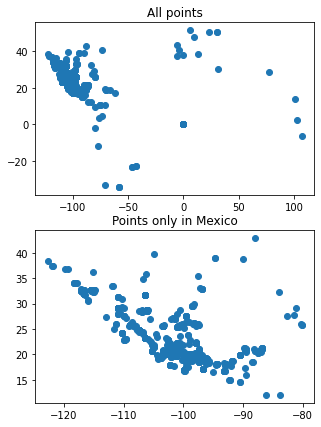

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# data as float
x = clean_data[['Longitude', 'Latitude']].astype(float)

#remove data non in Mexico
x1 = x[(x['Longitude']<-80) & (x['Latitude'] >10)]

# plot
fig, axs = plt.subplots(2, figsize=[5,7])
axs[0].title.set_text('All points')
axs[1].title.set_text('Points only in Mexico')
axs[0].scatter(x['Longitude'], x['Latitude'])
axs[1].scatter(x1['Longitude'], x1['Latitude'])

print(f'Points in total {len(x)}')
print(f'Points only in Mexico {len(x1)}')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


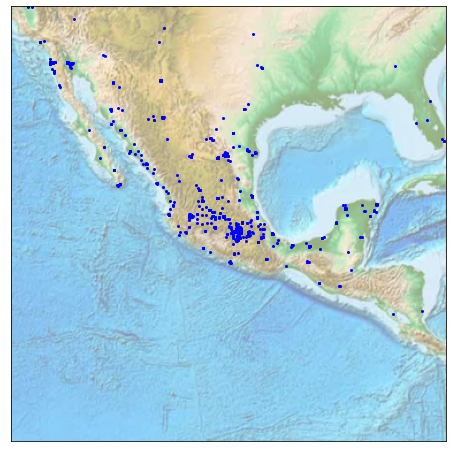

In [ ]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=4E6, 
            lat_0=20, lon_0=-100)
m.etopo(scale=0.7, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
long = x1['Longitude'].tolist()
lati = x1['Latitude'].tolist()
for lo, la in zip(long, lati):
  x, y = m(lo,la)
  plt.plot(x, y,marker='o', c='b', markersize=2)


Using K-means to cluster the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


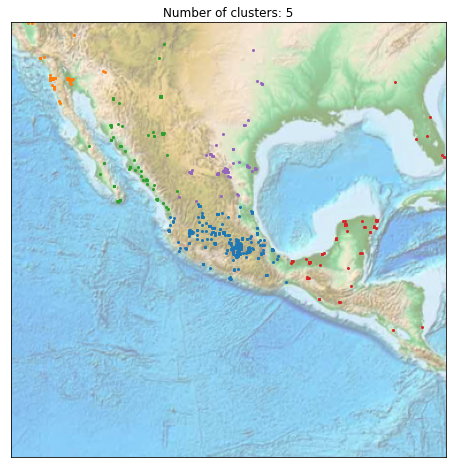

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

k=5
kmeans = KMeans(n_clusters=k, random_state=0).fit(x1)
kmeans.labels_
colours = dict(zip(range(10), mcolors.TABLEAU_COLORS))

plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=4E6, 
            lat_0=20, lon_0=-100)
m.etopo(scale=0.7, alpha=0.5)
for lo, la, label in zip(long, lati, kmeans.labels_):
  x, y = m(lo,la)
  plt.plot(x, y,marker='o', c=colours.get(label), markersize=2)

plt.title(f'Number of clusters: {5}')
plt.show()

## Using KNN to classify new address.

In [ ]:
# Library to access Google API
from geopy.geocoders import GoogleV3
import time
import numpy as np


# API Key
geolocator = GoogleV3(API)
loc = []

# Getting a new address
new_address = 'Sierrra Mojada'
new_point = geolocator.geocode(new_address)
cord_new_address = np.array([new_point.longitude, new_point.latitude]).reshape(1, -1)
cord_new_address

array([[-103.7014059,   27.2906955]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


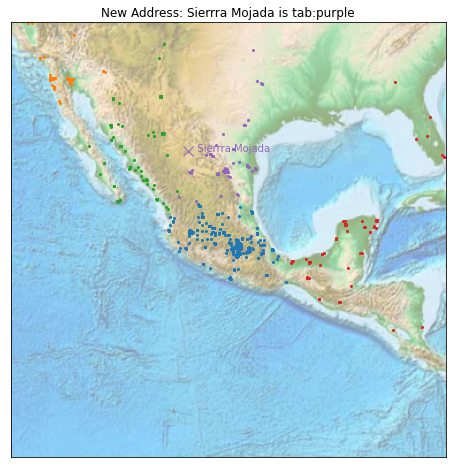

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(x1,kmeans.labels_)
prediction = model.predict(cord_new_address)


plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=4E6, 
            lat_0=20, lon_0=-100)
m.etopo(scale=0.7, alpha=0.5)
for lo, la, label in zip(long, lati, kmeans.labels_):
  x, y = m(lo,la)
  plt.plot(x, y,marker='o', c=colours.get(label), markersize=2)

x,y = m(new_point.longitude, new_point.latitude)
plt.plot(x, y, marker='x', c=colours.get(prediction[0]), markersize=10)
plt.text(x, y, f'   {new_address}',c=colours.get(prediction[0]))
plt.title(f'New Address: {new_address} is {colours.get(int(prediction[0]))}')
plt.show()